_________________

# Imports

Import all relevant dependencies
_________________

In [1]:
import torch
from utils import plot_digits

from models.autoencoder.autoencoder import  Autoencoder
from models.ebm.energy_net import EnergyNet

import matplotlib.pyplot as plt

import torch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


_________________

# Load Autoencoder and EBM
The best parameters are saved with the prefix 'best' in the checkpoints folder
_________________

In [2]:
# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Autoencoder
autoencoder = Autoencoder(input_dim=28*28, hidden_dim=1024, encoded_dim=4)
autoencoder.to(device)

# Load pretrained best checkpoint
best_autoencoder_ckpt_path = './saved_ckpts/autoencoder/autoencoder_best.pth'
autoencoder.load_pretrained_model(model_ckpt_path=best_autoencoder_ckpt_path)

# Load EBM
energy_model = EnergyNet(in_dim=autoencoder.encoded_dim, autoencoder_ckpt_path=autoencoder.ckpt_path ,hid_dim=8)
energy_model.to(device)

# Load pretrained best checkpoint
best_ebm_ckpt_path = './saved_ckpts/ebm/ebm_best.pth'
energy_model.load_pretrained_model(model_ckpt_path=best_ebm_ckpt_path)

Model Loaded Sucessully
Model Loaded Sucessully


______________________________

# EBM : Inference
Once the autoencoder is ready, we move onto see the results of trained EBM
______________________________



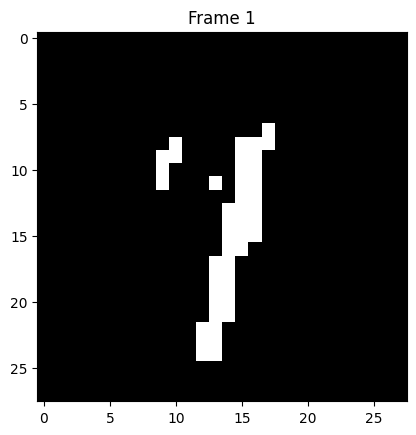

In [3]:
self = energy_model
from models.ebm.energy_net_utils import langevin_MCMC
X, X_samples = langevin_MCMC(f_theta=self, input_dim=autoencoder.encoded_dim,  
                        batch_size=1, num_steps=10000, eps=.001, interval_samples=True)

Z = []

for x_sample in  X_samples:

    generated_data = autoencoder.decoder.predict(x_sample.to(device))
    generated_data = generated_data.detach().to('cpu')
    generated_data = generated_data.reshape(-1,28,28)
    
    Z.append(generated_data.squeeze(0))



fig, ax = plt.subplots()
def update(frame):
    ax.clear()  # Clear the previous image
    ax.imshow(Z[:500][frame].numpy(), cmap='gray')
    ax.set_title(f'Frame {frame + 1}')
    return ax

ani = FuncAnimation(fig, update, frames=len(Z[:500]), repeat=True, interval=50)  # Adjust the interval as needed

# Display the animation in the notebook
HTML(ani.to_jshtml())



_______________________

# THANK YOU
_______________________
